In [20]:
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

Load file and split input from target

In [42]:
with open("diabetes.txt","r") as file:
    csvreader = csv.reader(file, delimiter=' ')
    table = np.asarray([row for row in csvreader], dtype=np.float)
xs = np.transpose(table[:,0:-1])
ys = table[:,-1]

Check what we actually loaded (first two examples)

In [43]:
print(xs.shape,ys.shape)
print(xs[:,:2])
print(ys[:2])

(10, 442) (442,)
[[ 0.038076 -0.001882]
 [ 0.05068  -0.044642]
 [ 0.061696 -0.051474]
 [ 0.021872 -0.026328]
 [-0.044223 -0.008449]
 [-0.034821 -0.019163]
 [-0.043401  0.074412]
 [-0.002592 -0.039493]
 [ 0.019908 -0.06833 ]
 [-0.017646 -0.092204]]
[151.  75.]


add constant feature

In [52]:
xs = np.vstack([xs,np.ones((1,xs.shape[1]))])
print(xs[:,0])

[ 0.038076  0.05068   0.061696  0.021872 -0.044223 -0.034821 -0.043401
 -0.002592  0.019908 -0.017646  1.      ]


split data (here fixed splitting at 200 and 400)

In [53]:
(train_dat,val_dat,test_dat) = ((xs[:,:100],ys[:100]),(xs[:,200:400],ys[200:400]),(xs[:,400:],ys[400:]))

ridge regression

In [54]:
def solve_ridge_regression(inputs,outputs,regularization):
    d,n = inputs.shape
    inverted = np.linalg.inv(np.dot(inputs,np.transpose(inputs))+regularization*np.eye(d))
    w = np.dot(np.dot(inverted,inputs), outputs)
    return w              

In [55]:
parameter = solve_ridge_regression(train_dat[0],train_dat[1],0.)
parameter

array([  31.94608079, -387.53912739,  476.69855714,  176.85827758,
        296.4459364 , -641.07753001, -227.54044767,  310.34200479,
        544.37503007,  -57.72684959,  146.4345339 ])

In [56]:
def evaluate_linear_model(inputs,outputs,parameters):
    predictions = np.dot(parameters,inputs)    
    return np.sum(np.square(predictions - outputs))/len(predictions)

In [57]:
np.sqrt(evaluate_linear_model(test_dat[0],test_dat[1],parameter))

41.75683310769331

Least Squares

In [58]:
lsm = solve_ridge_regression(train_dat[0], train_dat[1], 0)
lsm_train_error = evaluate_linear_model(train_dat[0],train_dat[1],lsm)
lsm_val_error   = evaluate_linear_model(val_dat[0],val_dat[1],lsm)

Ridge Regression

In [59]:
ls = range(-20,10)
learned_models = [ solve_ridge_regression(train_dat[0], train_dat[1], 2**l) for l in ls ]
train_errors= [ evaluate_linear_model(train_dat[0],train_dat[1],w) for w in learned_models]
val_errors= [ evaluate_linear_model(val_dat[0],val_dat[1],w) for w in learned_models]
min_val_idx = np.argmin(val_errors)

Text(0,0.5,'Error')

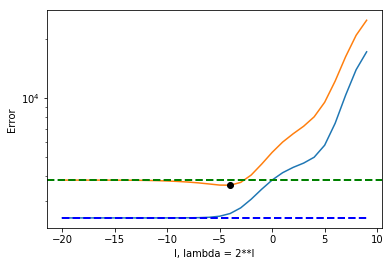

In [62]:
plt.plot(ls,train_errors)
plt.plot(ls,val_errors)
plt.yscale("log")
plt.plot([ls[0], ls[-1]], [lsm_train_error, lsm_train_error], color='b', linestyle='--', linewidth=2)
plt.axhline(y=lsm_val_error, color='g', linestyle='--', linewidth=2)
#plt.plot([ls[0], ls[-1]], [lsm_val_error, lsm_val_error], color='g', linestyle='--', linewidth=2)
plt.plot(ls[min_val_idx], val_errors[min_val_idx], color='k', marker='o')
plt.xlabel("l, lambda = 2**l")
plt.ylabel("Error")